In [11]:
#Necessary packages to run the code in this file
import pandas as pd
import seaborn as sb
import colorcet as cc
import matplotlib.pyplot as plt

In [3]:
#Importing the dataset
df = pd.read_csv('CDS492_Dataset.csv')

df.head(10)

,Year,Month,Carrier,Carrier_Name,Arrival Flights,Delays,Employees,Passengers,Delays_Over_Flights,Employees_Over_Flights,Passengers_Over_Flights
0,2021,12,9E,Endeavor,21876,793,5046,1109664,0.036250,0.230664,50.725178
1,2021,12,AA,American_Airlines,71824,4495,97881,12155584,0.062584,1.362790,169.241256
2,2021,12,AS,Alaska_Airlines,16885,1430,17054,2318889,0.084691,1.010009,137.334261
3,2021,12,B6,JetBlue_Airways,21181,2962,20680,3027871,0.139842,0.976347,142.952221
4,2021,12,DL,Delta_Air_Lines,68537,5164,81679,10380082,0.075346,1.191750,151.452237
5,2021,12,F9,Frontier_Airlines,13160,1254,5502,2055503,0.095289,0.418085,156.193237
6,2021,12,G4,Allegiant_Air,10339,849,4707,1326080,0.082116,0.455266,128.259986
7,2021,12,HA,Hawaiian_Airlines,6206,745,6599,735499,0.120045,1.063326,118.514180
8,2021,12,MQ,Envoy_Air,22845,1040,15305,1263213,0.045524,0.669950,55.294944
9,2021,12,NK,Spirit_Air_Lines,17985,1475,10433,3002407,0.082013,0.580095,166.939505


In [4]:
#Creating a new dataset with the variables of interest
df2 = df[['Carrier_Name', 'Delays_Over_Flights', 'Employees_Over_Flights', 'Passengers_Over_Flights']]
df2.head(10)

,Carrier_Name,Delays_Over_Flights,Employees_Over_Flights,Passengers_Over_Flights
0,Endeavor,0.036250,0.230664,50.725178
1,American_Airlines,0.062584,1.362790,169.241256
2,Alaska_Airlines,0.084691,1.010009,137.334261
3,JetBlue_Airways,0.139842,0.976347,142.952221
4,Delta_Air_Lines,0.075346,1.191750,151.452237
5,Frontier_Airlines,0.095289,0.418085,156.193237
6,Allegiant_Air,0.082116,0.455266,128.259986
7,Hawaiian_Airlines,0.120045,1.063326,118.514180
8,Envoy_Air,0.045524,0.669950,55.294944
9,Spirit_Air_Lines,0.082013,0.580095,166.939505


In [5]:
#Summary statistics for the dataset
df2.describe()

,Delays_Over_Flights,Employees_Over_Flights,Passengers_Over_Flights
count,1344.000000,1344.000000,1344.000000
mean,0.041969,0.733795,95.976385
std,0.027366,0.854767,61.444475
min,0.000000,0.000000,0.000000
25%,0.026610,0.219882,47.184850
50%,0.041558,0.518705,119.773520
75%,0.058200,1.013264,148.265143
max,0.183047,11.683366,201.001110


In [6]:
#Correlation of Employees vs Delays
corr = df2['Delays_Over_Flights'].corr(df2['Employees_Over_Flights'])
corr

0.17560367653640405

In [7]:
#Correlation of Passengers vs Delays
corr2 = df2['Delays_Over_Flights'].corr(df2['Passengers_Over_Flights'])
corr2

0.643352414564114

In [8]:
#Correlation within the dataset as a whole
df2.corr()

,Delays_Over_Flights,Employees_Over_Flights,Passengers_Over_Flights
Delays_Over_Flights,1.000000,0.175604,0.643352
Employees_Over_Flights,0.175604,1.000000,0.395819
Passengers_Over_Flights,0.643352,0.395819,1.000000


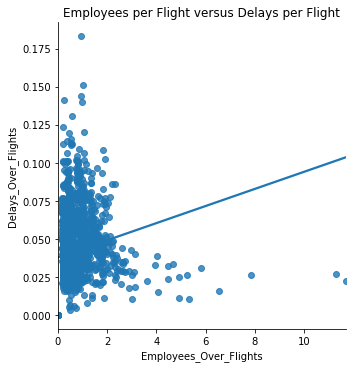

In [9]:
#Regression plot for Employees vs Delays for overall data
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df2).set(title='Employees per Flight versus Delays per Flight')

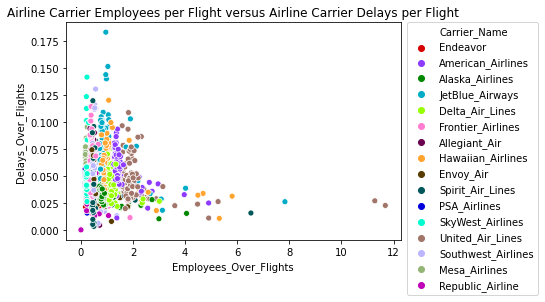

In [12]:
#Regession plot for overall data for Employees vs Delays with separation by carrier name
sb.scatterplot(x=df2['Employees_Over_Flights'], y=df2['Delays_Over_Flights'], hue=df2['Carrier_Name'], palette=sb.color_palette(cc.glasbey, n_colors=16)).set(title='Airline Carrier Employees per Flight versus Airline Carrier Delays per Flight')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

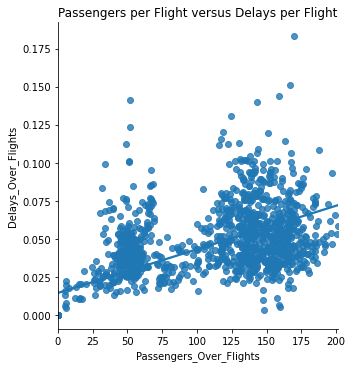

In [13]:
#Regression plot for Passengers vs Delays for overall data
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df2).set(title='Passengers per Flight versus Delays per Flight')

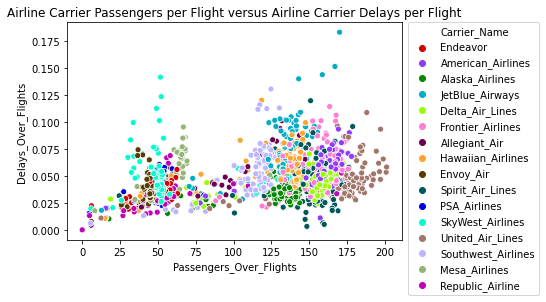

In [14]:
#Regession plot for overall data for Passengers vs Delays with separation by carrier name
sb.scatterplot(x=df2['Passengers_Over_Flights'], y=df2['Delays_Over_Flights'], hue=df2['Carrier_Name'], palette=sb.color_palette(cc.glasbey, n_colors=16)).set(title='Airline Carrier Passengers per Flight versus Airline Carrier Delays per Flight')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

In [15]:
#Creating individual datasets for each airline
df_endeavor = df2[df2['Carrier_Name'] == 'Endeavor']
df_american = df2[df2['Carrier_Name'] == 'American_Airlines']
df_alaska = df2[df2['Carrier_Name'] == 'Alaska_Airlines']
df_jetblue = df2[df2['Carrier_Name'] == 'JetBlue_Airways']
df_delta = df2[df2['Carrier_Name'] == 'Delta_Air_Lines']
df_frontier = df2[df2['Carrier_Name'] == 'Frontier_Airlines']
df_allegiant = df2[df2['Carrier_Name'] == 'Allegiant_Air']
df_hawaiian = df2[df2['Carrier_Name'] == 'Hawaiian_Airlines']
df_envoy = df2[df2['Carrier_Name'] == 'Envoy_Air']
df_spirit = df2[df2['Carrier_Name'] == 'Spirit_Air_Lines']
df_psa = df2[df2['Carrier_Name'] == 'PSA_Airlines']
df_skywest = df2[df2['Carrier_Name'] == 'SkyWest_Airlines']
df_united = df2[df2['Carrier_Name'] == 'United_Air_Lines']
df_southwest = df2[df2['Carrier_Name'] == 'Southwest_Airlines']
df_mesa = df2[df2['Carrier_Name'] == 'Mesa_Airlines']
df_republic = df2[df2['Carrier_Name'] == 'Republic_Airline']

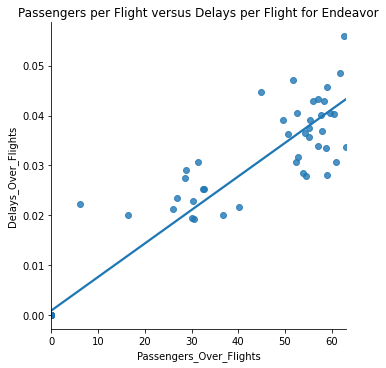

In [16]:
#Regression plot for Endeavor
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_endeavor).set(title='Passengers per Flight versus Delays per Flight for Endeavor')

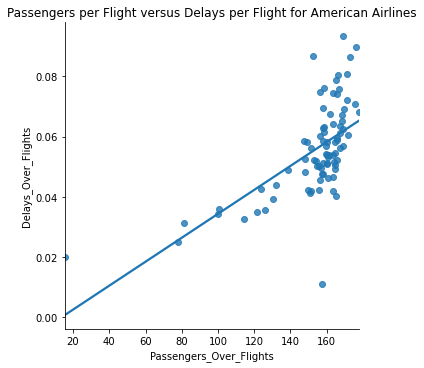

In [17]:
#Regression plot for American
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_american).set(title='Passengers per Flight versus Delays per Flight for American Airlines')

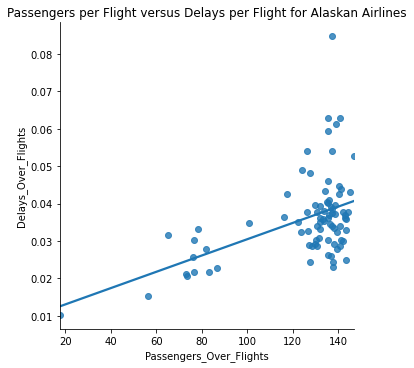

In [18]:
#Regression plot for Alaskan
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_alaska).set(title='Passengers per Flight versus Delays per Flight for Alaskan Airlines')

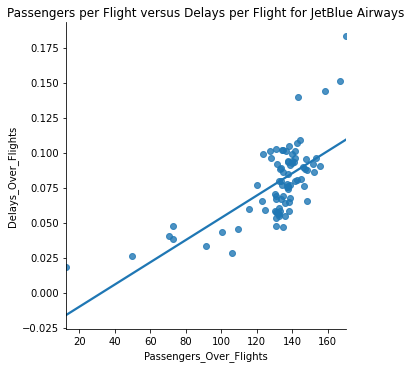

In [19]:
#Regression plot for JetBlue
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_jetblue).set(title='Passengers per Flight versus Delays per Flight for JetBlue Airways')

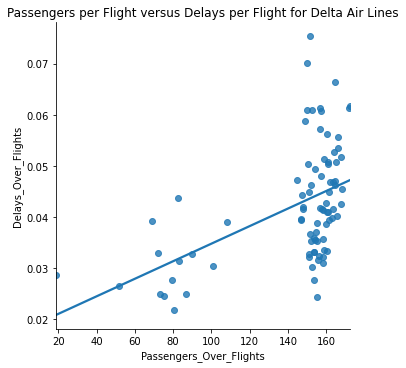

In [20]:
#Regression plot for Delta
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_delta).set(title='Passengers per Flight versus Delays per Flight for Delta Air Lines')

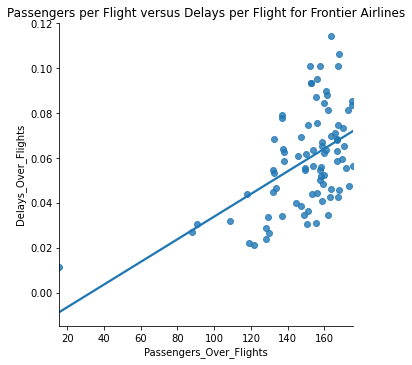

In [21]:
#Regression plot for Frontier
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_frontier).set(title='Passengers per Flight versus Delays per Flight for Frontier Airlines')

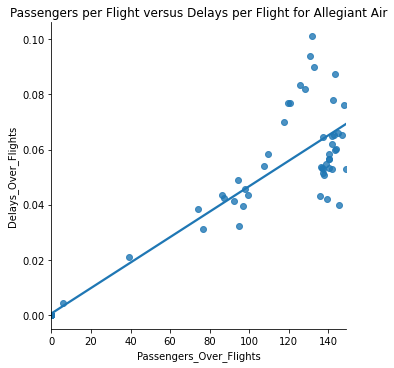

In [22]:
#Regression plot for Allegiant
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_allegiant).set(title='Passengers per Flight versus Delays per Flight for Allegiant Air')

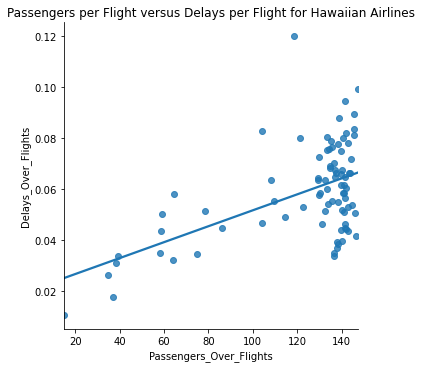

In [23]:
#Regression plot for Hawaiian
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_hawaiian).set(title='Passengers per Flight versus Delays per Flight for Hawaiian Airlines')

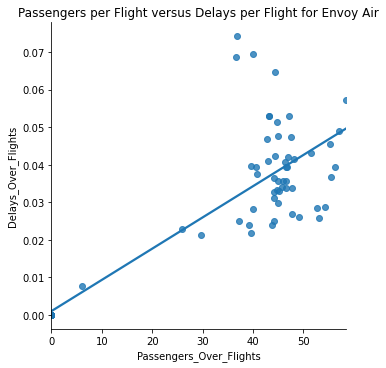

In [24]:
#Regression plot for Envoy
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_envoy).set(title='Passengers per Flight versus Delays per Flight for Envoy Air')

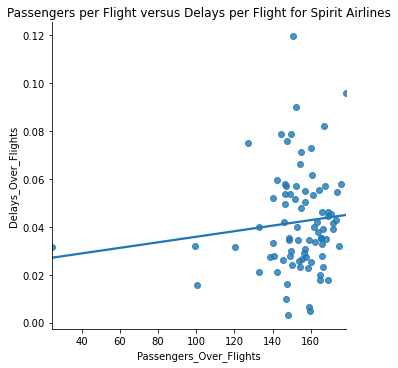

In [25]:
#Regression plot for Spirit
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_spirit).set(title='Passengers per Flight versus Delays per Flight for Spirit Airlines')

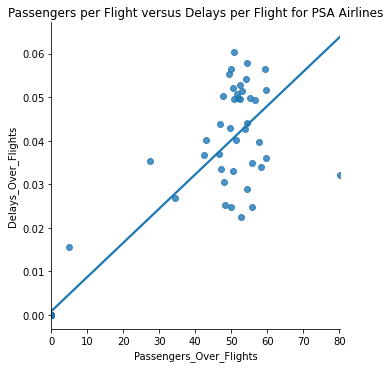

In [26]:
#Regression plot for PSA
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_psa).set(title='Passengers per Flight versus Delays per Flight for PSA Airlines')

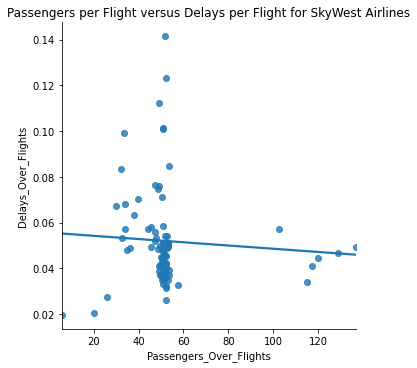

In [27]:
#Regression plot for SkyWest
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_skywest).set(title='Passengers per Flight versus Delays per Flight for SkyWest Airlines')

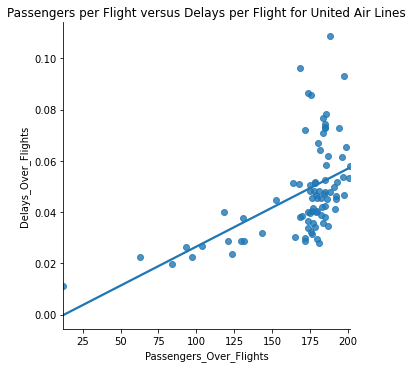

In [36]:
#Regression plot for United
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_united).set(title='Passengers per Flight versus Delays per Flight for United Air Lines')

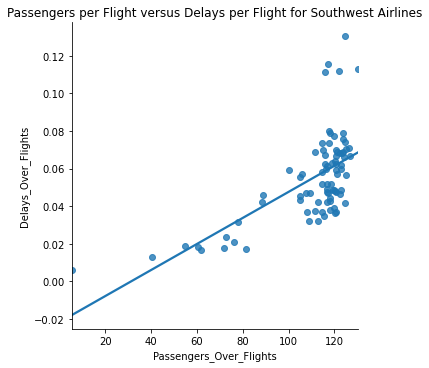

In [35]:
#Regression plot for Southwest
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_southwest).set(title='Passengers per Flight versus Delays per Flight for Southwest Airlines')

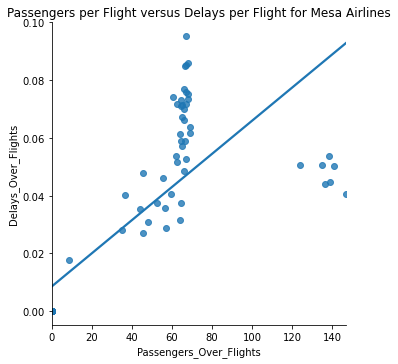

In [34]:
#Regression plot for Mesa
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_mesa).set(title='Passengers per Flight versus Delays per Flight for Mesa Airlines')

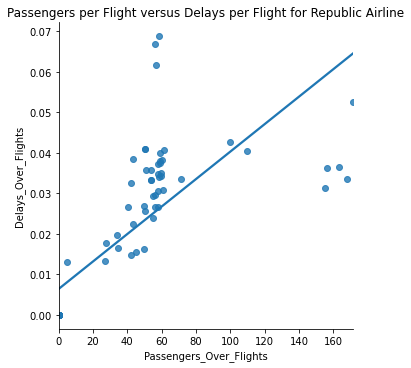

In [33]:
#Regression plot for Republic
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_republic).set(title='Passengers per Flight versus Delays per Flight for Republic Airline')

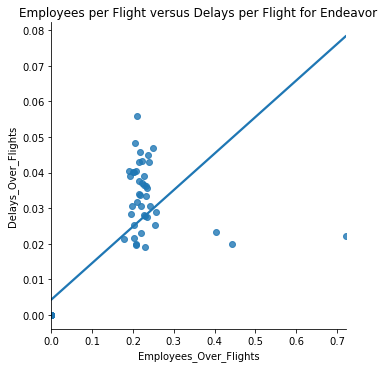

In [37]:
#Regression plot for Endeavor
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_endeavor).set(title='Employees per Flight versus Delays per Flight for Endeavor')

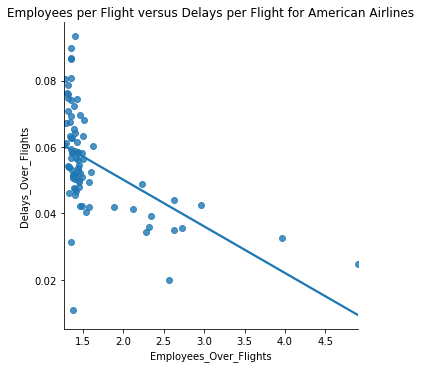

In [38]:
#Regression plot for American
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_american).set(title='Employees per Flight versus Delays per Flight for American Airlines')

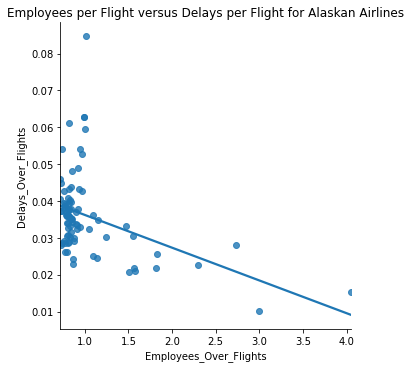

In [39]:
#Regression plot for Alaskan
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_alaska).set(title='Employees per Flight versus Delays per Flight for Alaskan Airlines')

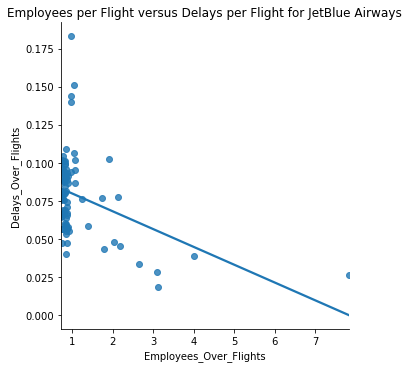

In [40]:
#Regression plot for JetBlue
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_jetblue).set(title='Employees per Flight versus Delays per Flight for JetBlue Airways')

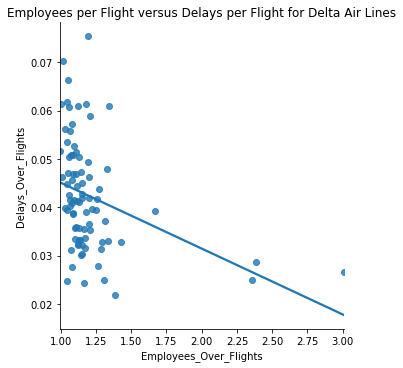

In [41]:
#Regression plot for Delta
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_delta).set(title='Employees per Flight versus Delays per Flight for Delta Air Lines')

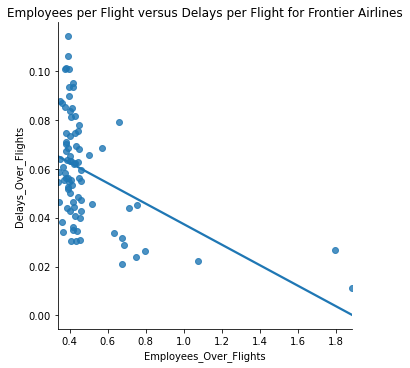

In [42]:
#Regression plot for Frontier
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_frontier).set(title='Employees per Flight versus Delays per Flight for Frontier Airlines')

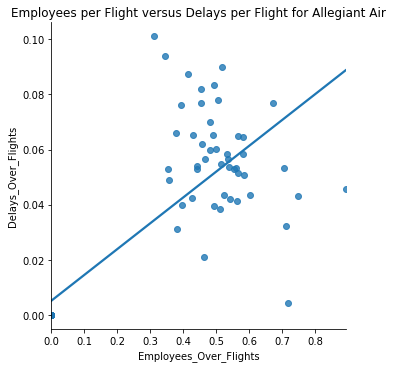

In [43]:
#Regression plot for Allegiant
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_allegiant).set(title='Employees per Flight versus Delays per Flight for Allegiant Air')

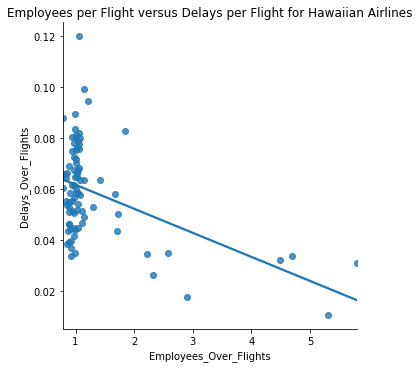

In [44]:
#Regression plot for Hawaiian
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_hawaiian).set(title='Employees per Flight versus Delays per Flight for Hawaiian Airlines')

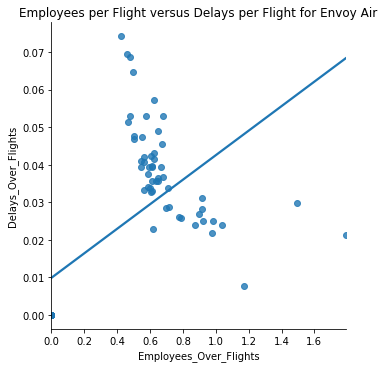

In [45]:
#Regression plot for Envoy
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_envoy).set(title='Employees per Flight versus Delays per Flight for Envoy Air')

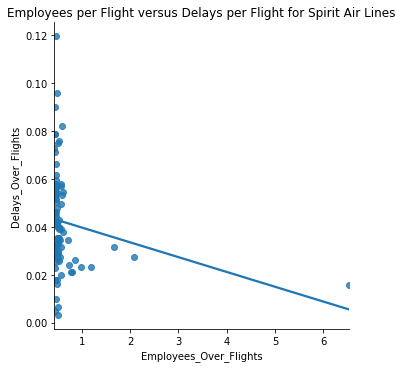

In [46]:
#Regression plot for Spirit
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_spirit).set(title='Employees per Flight versus Delays per Flight for Spirit Air Lines')

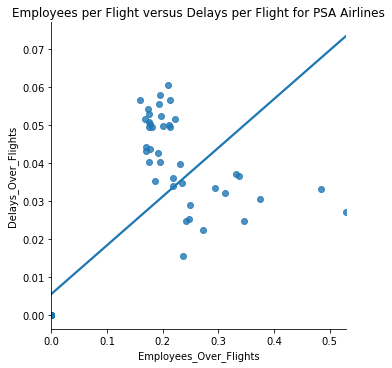

In [48]:
#Regression plot for PSA
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_psa).set(title='Employees per Flight versus Delays per Flight for PSA Airlines')

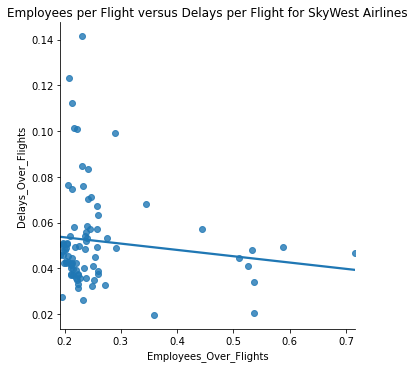

In [49]:
#Regression plot for SkyWest
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_skywest).set(title='Employees per Flight versus Delays per Flight for SkyWest Airlines')

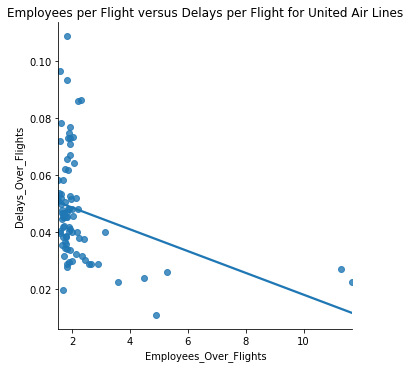

In [50]:
#Regression plot for United
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_united).set(title='Employees per Flight versus Delays per Flight for United Air Lines')

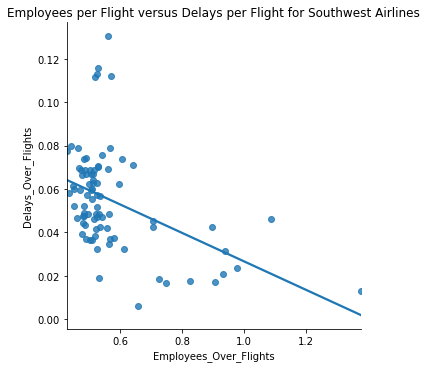

In [51]:
#Regression plot for Southwest
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_southwest).set(title='Employees per Flight versus Delays per Flight for Southwest Airlines')

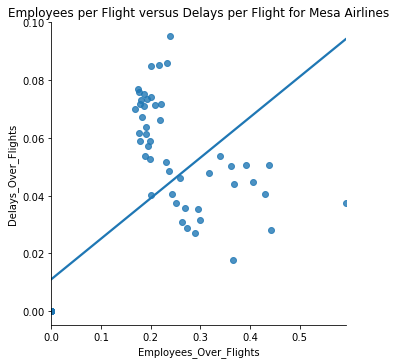

In [52]:
#Regression plot for Mesa
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_mesa).set(title='Employees per Flight versus Delays per Flight for Mesa Airlines')

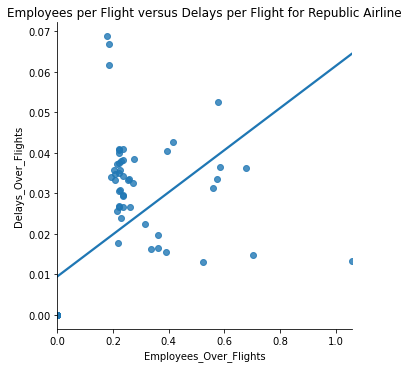

In [53]:
#Regression plot for Endeavor
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_republic).set(title='Employees per Flight versus Delays per Flight for Republic Airline')

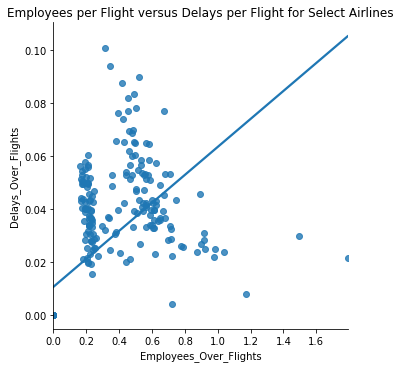

In [54]:
#Regression plot for stronger correlated airlines for employees
df_strong = df2[df2['Carrier_Name'].isin(['Endeavor', 'Allegiant_Air', 'Envoy_Air', 'PSA_Airlines'])]
sb.lmplot(x = 'Employees_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_strong).set(title='Employees per Flight versus Delays per Flight for Select Airlines')

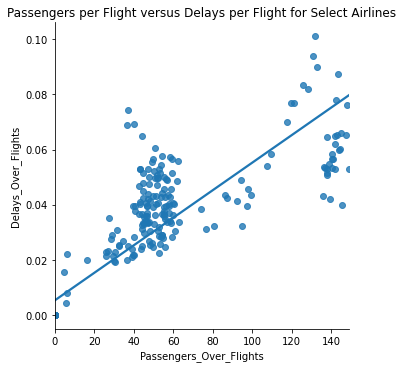

In [55]:
#Regression plot for stronger correlated airlines for passengers
sb.lmplot(x = 'Passengers_Over_Flights', y = 'Delays_Over_Flights', ci = None, data = df_strong).set(title='Passengers per Flight versus Delays per Flight for Select Airlines')

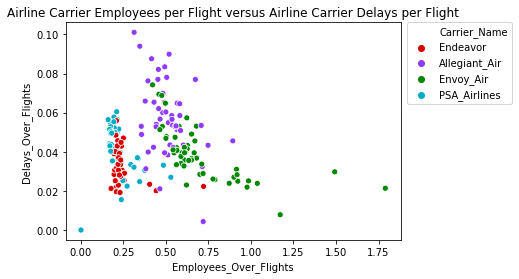

In [57]:
#Regression plot with carrier names includes for stronger correlated airlines for employees
sb.scatterplot(x=df_strong['Employees_Over_Flights'], y=df_strong['Delays_Over_Flights'], hue=df_strong['Carrier_Name'], palette=sb.color_palette(cc.glasbey, n_colors=4)).set(title='Airline Carrier Employees per Flight versus Airline Carrier Delays per Flight')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

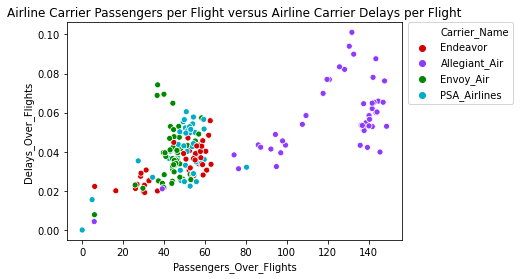

In [58]:
#Regression plot with carrier names included for stronger correlated airlines for passengers
sb.scatterplot(x=df_strong['Passengers_Over_Flights'], y=df_strong['Delays_Over_Flights'], hue=df_strong['Carrier_Name'], palette=sb.color_palette(cc.glasbey, n_colors=4)).set(title='Airline Carrier Passengers per Flight versus Airline Carrier Delays per Flight')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()